# We test ISD on a free linear code over some ring $\mathbb Z_{p^s}$

We sample a random vector $\mathbf e\in\mathbb Z_{p^s}^n$ with weight $w$, then project to a subring (which will be a field), solve the decoding problem in the subring and see if the found solution is the projection of the solution in the starting ring

We set $w = d/2$, where $d$ is the minimum distance of the projected code

In [15]:
reset()

def gv_bound(R,p):
    
    R_num.<x> = RR[]
    f = x*log(p-1,p)-x*log(x,p)-(1-x)*log(1-x,p)-(1-R)

    delta_val = find_root(f, 0, 1-1/p)
    
    return delta_val

def h2(x):
    
    return -x*log(x,2)-(1-x)*log(1-x,2)

# Test GV bound 

In [14]:
R = 0.4; p = 7
delta_val = gv_bound(R,p)
#print(delta_val)

n = 10000
k = round(R*n)
w = 1
while binomial(n,w)*(p-1)^(w)<p^(n-k):
    w += 1
w = w-1
print(N(w/n), delta_val)

0.307400000000000 0.3073058092531965


# Computes costs for different code rates, fixed p and s
# Weight of solution for SDP is set to half of GV bound


In [30]:
std_costs = []
new_costs = []

p = 2
s = 9

R_int_min = 5; R_int_max = 95; R_step = 1

for R_int in range(R_int_min,R_int_max+1,R_step):

    R = R_int/100
    omega_val = gv_bound(R,p)/2
    
    #std cost
    cost = h2(omega_val)-(1-R)*h2(omega_val/(1-R))
    std_costs.append((N(R), cost))
    
    #new cost
    alpha_coeff = 1-(p^(s-1)-1)/(p^s-1) 
    omega_val_star = alpha_coeff*omega_val #reduced weight, after projection
    
    #first, we consider cost in subring
    T_p = h2(omega_val_star)-(1-R)*h2(omega_val_star/(1-R))
    T_p_s = (1-omega_val_star)*h2((omega_val - omega_val_star)/(1-omega_val_star))-(1-omega_val_star-R)*h2((omega_val - omega_val_star)/(1-omega_val_star-R))
    new_cost = max(T_p, T_p_s)
    
    new_costs.append((N(R), new_cost))
    
    #print costs
    print(N(R), N(omega_val), N(cost), N(new_cost))
   

0.0500000000000000 0.184563874492256 0.0151417909812621 0.00795281303103040
0.0600000000000000 0.178403030414065 0.0176000455286549 0.00922957767276308
0.0700000000000000 0.172758225640381 0.0199318914000495 0.0104377081594571
0.0800000000000000 0.167523511986686 0.0221489335044338 0.0115837303470862
0.0900000000000000 0.162625223692295 0.0242603824472007 0.0126728164508756
0.100000000000000 0.158009673161804 0.0262737582031234 0.0137091839126279
0.110000000000000 0.153636292739640 0.0281953357590822 0.0146963478129926
0.120000000000000 0.149473537119751 0.0300304427397571 0.0156372893220232
0.130000000000000 0.145496298447410 0.0317836666500663 0.0165345729106930
0.140000000000000 0.141684202738058 0.0334590041300404 0.0173904307076782
0.150000000000000 0.138020445919899 0.0350599714797653 0.0182068249248073
0.160000000000000 0.134490974164421 0.0365896884402601 0.0189854951466555
0.170000000000000 0.131083891620046 0.0380509429786394 0.0197279948753046
0.180000000000000 0.12778902286

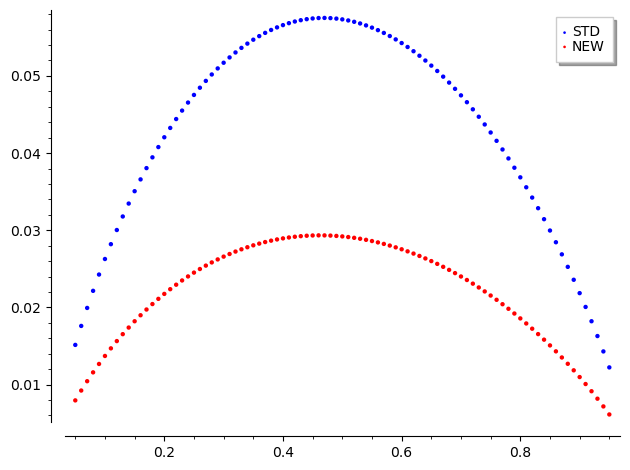

In [31]:
#plot results
g = list_plot(std_costs, color = 'blue',legend_label = "STD")
g += list_plot(new_costs, color = 'red', legend_label = "NEW")
g.show() 